# Análisis de datos en Python

Numpy y SciPy son dos librerías  para la computación científica en general, que roporcionan bibliotecas de gran alcance para la manipulación de arrays (como NumPy) y la de  gráficos (como matplotlib). Hasta hace poco, una librería  ausente era una para el manejo y manipulación de datos.

Los datos, por lo general no vienen  en una forma  lista para utilizar. Una parte muy importante de trabajar en problemas basados en datos como el machine learning  es el análisis de datos y la administración de datos.

- Análisis de datos: Este es el uso de  herramientas como estadística y visualización de datos para entender mejor el problema mediante el entendimiento  de los datos.
- Administración de datos : Este es el proceso de transformación de datos  en una forma  que sea apropiado para realizar  análisis de datos o  machine learning.


## Pandas 


Lecturas

- [Tutoriales de Panda](http://pandas.pydata.org/pandas-docs/stable/tutorials.html).
- [10 minutos de Pandas de Wes McKinney](https://vimeo.com/59324550).
- [Pandas para R](http://pandas.pydata.org/pandas-docs/stable/comparison_with_r.html).

El módulo `numpy` es una excelente librería para cálculos numéricos, pero no es muy útil, para manejar errores en los datos o arrays con tipos de distintos puntos. La librería [pandas](http://pandas.pydata.org/) proporciona objetos similares a los datos frames de [R](https://cran.r-project.org/) y son más convenientes para el análisis estadístico.

Pandas proporciona muchos métodos para importar y manipular datos. 


Pandas  utiliza NumPy para el manejo  rápido de arrays, ofrece convenientes propiedades  de operaciones estadísticas con [StatsModels](http://statsmodels.sourceforge.net/) y gráficos  con matplotlib.


Hay un fuerte enfoque en las series de tiempo dado que la creación de la  biblioteca surgió  en el ámbito financiero.

Tiene un fuerte enfoque en los data frames para el manejo de datos  estándar. El manejo de datos es un requisito básico de una biblioteca de este tipo y la velocidad se ha convertido en una prioridad. Es rápido y proporciona estructuras de datos y operaciones como la indexación y agrupación de operaciones.

###  Características de Pandas

Pandas tiene importantes características:

* Manipulación: movimiento de  columnas, remodelación, unión,filtración, etc.
* Manejo de series de tiempo: remuestreo, auto-alineación de conjuntos de datos, etc.
* Manejo de datos pérdidos: reemplazo, interpolación, etc de datos pérdidos.
* Operaciones por grupos: Agrupados como SQL.
* Indexado jerarquico: nivel en estructuras de datos, eficiencia en la organización de datos por columnas, etc.
* Propiedades de estadística: manejo  rápido y eficiente  de operaciones con datos estadísticos.
* Visualización: acceso a los gráficos de la estructura de datos.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas import Series, DataFrame, Panel
from string import ascii_lowercase as letters
from scipy.stats import chisqprob
%matplotlib inline

## Series 

Las series es 1-D arrays con etiquetas en los ejes.

In [3]:
# Creando una serie con lista arbitraria

s = pd.Series([3, "Python", 3.56, -123999, "ggplot2"])
s

0          3
1     Python
2       3.56
3    -123999
4    ggplot2
dtype: object

In [4]:
# Podemos especificar un indices para crear las Series

s1 = pd.Series([7, 'Java', 3.14, -1789710578, 'Hola a todos!'],
              index=['A', 'Z', 'C', 'Y', 'E'])
s1

A                7
Z             Java
C             3.14
Y      -1789710578
E    Hola a todos!
dtype: object

In [5]:
# El constructor de las series puede convertir tambien un diccionario,
# usando los keys de los diccionarios como indices

d = {'Python': 1000, 'R': 1300, 'Latex': 900, 'C': 1100,
     'Java': 450, 'html5': None}
lenguajes = pd.Series(d)
lenguajes


C         1100
Java       450
Latex      900
Python    1000
R         1300
html5      NaN
dtype: float64

In [6]:
# Indexando los indices para seleccionar elementos desde la serie

lenguajes[['Python', 'Latex', 'html5']]

Python    1000
Latex      900
html5      NaN
dtype: float64

In [7]:
# Usamos indexado booleano

s2 = lenguajes < 1000
print(s2)
print('\n')
print(lenguajes[s2])

C         False
Java       True
Latex      True
Python    False
R         False
html5     False
dtype: bool


Java     450
Latex    900
dtype: float64


In [8]:
# podemos cambiar los valores en una series

print('otro valor:', lenguajes['Latex'])
lenguajes['Latex'] = 1400
print('Nuevo valor:', lenguajes['Latex'])

otro valor: 900.0
Nuevo valor: 1400.0


In [11]:
# Cambiando valores con logica booleana

print(lenguajes[lenguajes < 1000])
print('\n')
lenguajes[lenguajes < 1000] = 750

print (lenguajes[lenguajes < 1000])

Java    750
dtype: float64


Java    750
dtype: float64


In [13]:
# Verificamos sin un indice esta en una serie

print('Python' in lenguajes)
print('haskell' in lenguajes)

True
False


In [15]:
# podemos realizar operaciones matematicas usando escalares y funciones

lenguajes/4

C         275.0
Java      187.5
Latex     350.0
Python    250.0
R         325.0
html5       NaN
dtype: float64

In [18]:
# cuadrados de los valores de los lenguajes

np.square(lenguajes)

C         1210000
Java       562500
Latex     1960000
Python    1000000
R         1690000
html5         NaN
dtype: float64

Se pueden añadir dos series, que devuelven una unión de las dos series con la propiedad adicional que ocurren en los valores de los índices compartidos. Los valores en  las series que no tienen un índice  compartido producirán un `NULL/NaN` (no es un número).

In [19]:
print(lenguajes[['Python', 'R', 'C']])
print('\n')
print(lenguajes[['R', 'Java']])
print('\n')
print(lenguajes[['Python', 'R', 'C']] + lenguajes[['R', 'Java']])

Python    1000
R         1300
C         1100
dtype: float64


R       1300
Java     750
dtype: float64


C          NaN
Java       NaN
Python     NaN
R         2600
dtype: float64


`C, Java, Python` no se encuentran en la nueva serie, así que se retorna  valores `NULL/NA`.

In [20]:
# retornamos una serie de valores booleanos, que no son NULL

lenguajes.notnull()

C          True
Java       True
Latex      True
Python     True
R          True
html5     False
dtype: bool

In [21]:
# usando logica booleana para guardar los valores NULL

print(lenguajes.isnull())
print('\n')
print(lenguajes[lenguajes.isnull()])

C         False
Java      False
Latex     False
Python    False
R         False
html5      True
dtype: bool


html5   NaN
dtype: float64


In [29]:
# otro ejemplo

s3 = Series(np.arange(25), index=tuple(letters[:25]))

print (s3[:3],'\n')
print (s3[7:], '\n')
print (s3[::3], '\n')
print (s3[['d', 'f', 'h']], '\n')
print (s3.d, s3.f, s3.h)

a    0
b    1
c    2
dtype: int32 

h     7
i     8
j     9
k    10
l    11
m    12
n    13
o    14
p    15
q    16
r    17
s    18
t    19
u    20
v    21
w    22
x    23
y    24
dtype: int32 

a     0
d     3
g     6
j     9
m    12
p    15
s    18
v    21
y    24
dtype: int32 

d    3
f    5
h    7
dtype: int32 

3 5 7


In [30]:
# Todas las funciones de Numpy se pueden utilizar con objetos Series y retornar otra Serie

a ,b = np.mean(s3), np.var(s3)
a ,b

(12.0, 52.0)

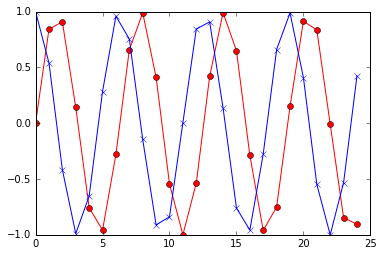

In [31]:
# Matplotlib funciona con los objeto Series

plt.plot(s3, np.sin(s3), 'r-o', s3, np.cos(s3), 'b-x');

In [38]:
# Ejemplo sobre el uso del objeto Series en la representacion de series de tiempo

import datetime as dt
from pandas import date_range

# dias y fechas
hoy = dt.datetime.strptime('Jan 21 2015', '%b %d %Y')
print (hoy, '\n')
dias = date_range(hoy, periods=35, freq='D')
st = Series(np.random.normal(10, 1, len(dias)), index=dias)

# Extraemos elementos
print (st[0:4], '\n')
print (st['2015-01-21':'2015-01-28'], '\n') 

2015-01-21 00:00:00 

2015-01-21     8.551924
2015-01-22    10.134389
2015-01-23     9.799162
2015-01-24    11.103569
Freq: D, dtype: float64 

2015-01-21     8.551924
2015-01-22    10.134389
2015-01-23     9.799162
2015-01-24    11.103569
2015-01-25     7.545525
2015-01-26    10.797901
2015-01-27    11.335752
2015-01-28     9.132736
Freq: D, dtype: float64 



In [39]:
# podemos generar operaciones estadisticas con el metodo resamble

df = st.resample(rule ='W', how =('mean', 'std', lambda x: sum(x*x)))
df                                  

,mean,std,<lambda>
2015-01-25,9.426914,1.392434,452.089026
2015-02-01,10.064265,0.855725,713.419628
2015-02-08,9.784719,0.420047,671.243748
2015-02-15,9.279470,1.342445,613.572912
2015-02-22,9.638094,1.058458,656.972058
2015-03-01,9.490383,0.540561,180.426960


## Data frames

Un data frame es similar a un data frame en R, base de datos o hojas de cálculo, es decir es una estructura de datos tabular que comprende filas y columnas. Los data frames  se puede considerar como un grupo de objetos Series que comparten un índice (el nombre de las columnas).

In [40]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [41]:
# Renombrando columnas

df.columns = ('media', 'desviacion', 'suma_cuad')
print(df)

                media  desviacion   suma_cuad
2015-01-25   9.426914    1.392434  452.089026
2015-02-01  10.064265    0.855725  713.419628
2015-02-08   9.784719    0.420047  671.243748
2015-02-15   9.279470    1.342445  613.572912
2015-02-22   9.638094    1.058458  656.972058
2015-03-01   9.490383    0.540561  180.426960


In [42]:
# extrayendo columnas desde el data frame

print (df.media, '\n') # por atributos
print (df['desviacion'])  # por columnas

2015-01-25     9.426914
2015-02-01    10.064265
2015-02-08     9.784719
2015-02-15     9.279470
2015-02-22     9.638094
2015-03-01     9.490383
Freq: W-SUN, Name: media, dtype: float64 

2015-01-25    1.392434
2015-02-01    0.855725
2015-02-08    0.420047
2015-02-15    1.342445
2015-02-22    1.058458
2015-03-01    0.540561
Freq: W-SUN, Name: desviacion, dtype: float64


In [43]:
# Extrayendo bloques y escalares

print (df.iat[2, 2], '\n')         # extraemos un elemento con  iat()
print (df.loc['2015-01-25':'2015-03-01', 'suma_cuad'], '\n') # indexando por etiquetas
print (df.iloc[:3, 2], '\n')       # indexando por posicion 
print (df.ix[:3, 'suma_cuad'], '\n')     # por etiqueta o posicion

671.243748484 

2015-01-25    452.089026
2015-02-01    713.419628
2015-02-08    671.243748
2015-02-15    613.572912
2015-02-22    656.972058
2015-03-01    180.426960
Freq: W-SUN, Name: suma_cuad, dtype: float64 

2015-01-25    452.089026
2015-02-01    713.419628
2015-02-08    671.243748
Freq: W-SUN, Name: suma_cuad, dtype: float64 

2015-01-25    452.089026
2015-02-01    713.419628
2015-02-08    671.243748
Freq: W-SUN, Name: suma_cuad, dtype: float64 



In [46]:
# usando condiciones booleanas para seleccionar elementos

print (df[(df.media < 1) & (df.suma_cuad < 700)], '\n' )
print (df.query('desviacion < 1 and suma_cuad < 700'))  # uso del metodo query 

Empty DataFrame
Columns: [media, desviacion, suma_cuad]
Index: [] 

               media  desviacion   suma_cuad
2015-02-08  9.784719    0.420047  671.243748
2015-03-01  9.490383    0.540561  180.426960


Para crear un data frame  de las estructuras de datos de Python, podemos pasar un diccionario de  listas al constructor del data frame .

Utilizando el parámetro `columns` nos permite indicar  al constructor de cómo nos gustaría ordenar las columnas. De manera predeterminada, el constructor del data frame  ordenará las columnas alfabéticamente (aunque esto no es el caso cuando se lee de un archivo).

In [47]:
data1 = {'Fechas': [2010, 2011, 2012, 2011, 2012, 2010, 2011, 2012],
        'Lenguaje': ['R', 'Python', 'Python', 'Java', 'Java', 'C++', 'C++', 'C++'],
        'vic': [11, 8, 10, 15, 11, 6, 10, 4],
        'per': [5, 8, 6, 1, 5, 10, 6, 12]}
df2 = pd.DataFrame(data1, columns=['Fechas', 'Lenguaje', 'vic', 'per'])
df2

,Fechas,Lenguaje,vic,per
0,2010,R,11,5
1,2011,Python,8,8
2,2012,Python,10,6
3,2011,Java,15,1
4,2012,Java,11,5
5,2010,C++,6,10
6,2011,C++,10,6
7,2012,C++,4,12


## Split-Apply-Combine

Muchas operaciones  estadísticas se dividen (`split`) a lo largo de una cierta característica, a continuación,se aplica (`apply`) una función  a cada subgrupo y finalmente  se combina (`combine`) el resultado  en un objeto. Esto se conoce como la estrategia `split-apply-combine` y  se implementa en  pandas a través de  `groupby()` y una función que se puede aplicar a cada subgrupo.

In [27]:
#Ejemplo de la estrategia: split-apply-combine

url = 'https://raw.github.com/pydata/pandas/master/pandas/tests/data/tips.csv'
tips = pd.read_csv(url)
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [38]:
# Dividimos la base de datos sex y smoker en 2x2 grupos 

grupos = tips.groupby(['sex', 'smoker'])
grupos

In [39]:
# Aplicamos la funcion size() para contar el numero de entradas por grupo

grupos.size()

sex     smoker
Female  No        54
        Yes       33
Male    No        97
        Yes       60
dtype: int64

In [40]:
# Si necesitamos los margenes, usamos la funcion crosstab

pd.crosstab(tips.sex, tips.smoker, margins=True)

smoker,No,Yes,All
sex,,,
Female,54,33,87
Male,97,60,157
All,151,93,244


In [41]:
# Si se genera más de 1 columna en  los resultados, se devuelve una data frame

grupos.mean()

total_bill       tip      size
sex    smoker                                
Female No       18.105185  2.773519  2.592593
       Yes      17.977879  2.931515  2.242424
Male   No       19.791237  3.113402  2.711340
       Yes      22.284500  3.051167  2.500000

In [46]:
# Podemos transformar los datos originales para analisis mas conveniente
# Por ejemplo, supongamos que queremos estandizar unidades para total_bill y tips

zscore = lambda x: (x - x.mean())/x.std()

std_grupos = grupos['total_bill', 'tip'].transform(zscore)
std_grupos.head(n=4)

,total_bill,tip
0,-0.153049,-1.562813
1,-1.083042,-0.975727
2,0.139661,0.259539
3,0.445623,0.131984


In [47]:
# Supongamos que queremos aplicar  un conjunto de funciones a
# algunas columnas del conjunto de datos

grupos['total_bill', 'tip'].agg(['mean', 'min', 'max'])

total_bill                    tip            
                    mean   min    max      mean   min   max
sex    smoker                                              
Female No      18.105185  7.25  35.83  2.773519  1.00   5.2
       Yes     17.977879  3.07  44.30  2.931515  1.00   6.5
Male   No      19.791237  7.51  48.33  3.113402  1.25   9.0
       Yes     22.284500  7.25  50.81  3.051167  1.00  10.0

In [49]:
# Podemos aplicar funciones especificas para especificas columnas

df5 = grupos.agg({'total_bill': (min, max), 'tip': sum})
df5

total_bill            tip
                     min    max     sum
sex    smoker                          
Female No           7.25  35.83  149.77
       Yes          3.07  44.30   96.74
Male   No           7.51  48.33  302.00
       Yes          7.25  50.81  183.07

### CSV

Leer archivos `csv` se realiza utilizando la función `read_csv`. Por defecto esta función usa la coma como un separador de columnas, pero se puede cambiar con el parámetro `sep`.

In [58]:
%%bash
ls

iris.csv
Pandas.ipynb


In [59]:
!head -n 5 iris.csv

Sepalo.Longitud,Sepalo.Ancho,Petalo.Longitud,Petalo.Ancho,Especies
5.1,3.5,1.4,0.2,setosa
4.9,3,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa


In [60]:
csv1 = pd.read_csv('iris.csv')
csv1.head()

,Sepalo.Longitud,Sepalo.Ancho,Petalo.Longitud,Petalo.Ancho,Especies
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Usando statsmodels

Muchas de las herramientas estadísticas de R, son replicadas por [Statsmodels](http://statsmodels.sourceforge.net/) un módulo de Python para computación estadística y análisis de datos en Python. Statsmodels abarca los siguientes ítems:

* Modelos de regresión lineal.
* Modelos lineales generalizados.
* Estimados noparamétricos.
* Colección de conjuntos de datos
* Gráfico de funciones.
* Test estadísticos.
* Pruebas unitarias.
* Análisis de series de tiempo.
* Herramientas de entrada y salida.


In [6]:
%%bash
ls

iris.csv
Pandas.ipynb
salario.table


In [16]:
# Ejemplo de Jonathan Taylor ANOVA (Documentacion de Statsmodels)

from __future__ import print_function
from statsmodels.compat import urlopen
np.set_printoptions(precision=4, suppress=True)
import statsmodels.api as sm
pd.set_option("display.width", 100)
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm

try:
    salary_table = pd.read_csv('salary.table')
except:  
    url = 'http://stats191.stanford.edu/data/salary.table'
    fh = urlopen(url)
    salary_table = pd.read_table(fh)
    salary_table.to_csv('salary.table')

E = salary_table.E
M = salary_table.M
X = salary_table.X
S = salary_table.S


Grafiquemos los datos.

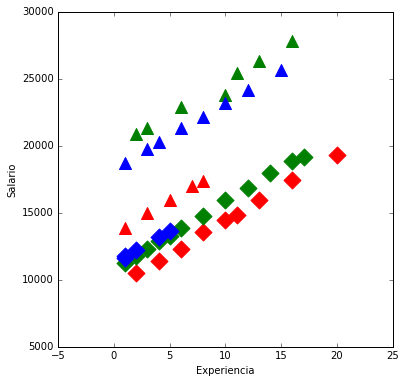

In [18]:
plt.figure(figsize=(6,6))
simbolos = ['D', '^']
colores = ['r', 'g', 'blue']
f_g = salary_table.groupby(['E','M'])
for valores, group in f_g:
    i,j = valores
    plt.scatter(group['X'], group['S'], marker=simbolos[j], color=colores[i-1],
               s=144)
plt.xlabel('Experiencia');
plt.ylabel('Salario');

Fijamos un modelo

In [19]:
formula = 'S ~ C(E) + C(M) + X'
lm = ols(formula, salary_table).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      S   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     226.8
Date:                lun, 30 may 2016   Prob (F-statistic):           2.23e-27
Time:                        19:27:04   Log-Likelihood:                -381.63
No. Observations:                  46   AIC:                             773.3
Df Residuals:                      41   BIC:                             782.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   8035.5976    386.689     20.781      0.0

In [22]:
# data frame disponible

lm.model.data.orig_exog[:5]

,Intercept,C(E)[T.2],C(E)[T.3],C(M)[T.1],X
0,1,0,0,1,1
1,1,0,1,0,1
2,1,0,1,1,1
3,1,1,0,0,1
4,1,0,1,0,1


In [23]:
# Mantenemos una referencia a los datos originales

lm.model.data.frame[:5]

,Unnamed: 0,S,X,E,M
0,0,13876,1,1,1
1,1,11608,1,3,0
2,2,18701,1,3,1
3,3,11283,1,2,0
4,4,11767,1,3,0


Probemos algunas interacciones mediante `ANOVA` o `f_test`

In [24]:
interX_lm = ols("S ~ C(E) * X + C(M)", salary_table).fit()
print(interX_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      S   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     158.6
Date:                lun, 30 may 2016   Prob (F-statistic):           8.23e-26
Time:                        19:53:04   Log-Likelihood:                -379.47
No. Observations:                  46   AIC:                             772.9
Df Residuals:                      39   BIC:                             785.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept    7256.2800    549.494     13.205      

## Usando R

Jupyter permite usar R sin problemas usando la extensión `Rmagic (rpy2.ipython)`. Hay dos maneras de usar `Rmagic`:

- Usando `%R` que se aplica a una sóla línea.
- `%% R`, se aplica a toda una caja.

Los objetos Python puede ser pasados en R con el flag `-i` y los objetos R, son pasados con el flag `-o`.